<a href="https://colab.research.google.com/github/Andersononoja/Hello-World/blob/master/Apple%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import csv
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors

In [27]:
# This program analyses the sentiment of the Apple Company from Twitter users.

In [28]:
#Import the libraries
import numpy as np
import csv
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors

In [29]:
#Upload the csv file
from google.colab import files
files.upload()

Saving apple.csv to apple (1).csv


{'apple.csv': b'unit_id,golden,unit_state,trusted_judgments,last_judgment_at,sentiment,sentiment_confidence,date,id,query,sentiment_gold,text\r\n623495513,true,golden,10,,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,540000000000000000,"#AAPL OR @Apple","3\nnot_relevant","#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx"\r\n623495514,true,golden,12,,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,540000000000000000,"#AAPL OR @Apple","3\n1","RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9"\r\n623495515,true,golden,10,,3,1,Mon Dec 01 19:50:28 +0000 2014,540000000000000000,"#AAPL OR @Apple",3,"My cat only chews @apple cords. Such an #AppleSnob."\r\n623495516,true,golden,17,,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,540000000000000000,"#AAPL OR @Apple","3\n1","I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it\'s extended so today\'s pullback is good to see"\r\n623495517,false,finalized,3,2014-12-12T12

In [30]:
# Store the data and display the first five row entries
cf = pd.read_csv('apple.csv')
cf.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,sentiment,sentiment_confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,540000000000000000,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,540000000000000000,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,540000000000000000,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,540000000000000000,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,2014-12-12T12:14:00,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,540000000000000000,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [4]:
# Display the size of the dataset
cf.shape

(3886, 12)

In [31]:
# Dropping some entries which are not necessary for this analysis and displaying the first five elements
cf.drop(['unit_id', 'last_judgment_at', 'sentiment_confidence', 'id', 'query', 'sentiment_gold'], axis=1, inplace=True)

cf.head()

,golden,unit_state,trusted_judgments,sentiment,date,text
0,True,golden,10,3,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,True,golden,12,3,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,True,golden,10,3,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,3,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,False,finalized,3,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL


In [32]:
# Displaying the first twenty elements
cf.head(20)

,golden,unit_state,trusted_judgments,sentiment,date,text
0,True,golden,10,3,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,True,golden,12,3,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,True,golden,10,3,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,3,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,False,finalized,3,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL
5,True,golden,13,3,Mon Dec 01 20:30:03 +0000 2014,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,True,golden,13,5,Mon Dec 01 20:32:45 +0000 2014,Top 3 all @Apple #tablets. Damn right! http://...
7,True,golden,9,5,Mon Dec 01 20:34:31 +0000 2014,CNBCTV: #Apple's margins better than expected?...
8,True,golden,15,3,Mon Dec 01 20:36:47 +0000 2014,Apple Inc. Flash Crash: What You Need to Know ...
9,False,finalized,3,3,Mon Dec 01 20:45:03 +0000 2014,#AAPL:This Presentation Shows What Makes The W...


In [33]:
# Changing the index of the dataset
df = cf.set_index("sentiment")
df.head()

,golden,unit_state,trusted_judgments,date,text
sentiment,,,,,
3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL


In [34]:
# Remove null entries
df = df.drop("not_relevant")

In [35]:
# Displaying the first twenty elements
df.head(20)

,golden,unit_state,trusted_judgments,date,text
sentiment,,,,,
3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL
3,True,golden,13,Mon Dec 01 20:30:03 +0000 2014,#AAPL:5 Rocket Stocks to Buy for December Gain...
5,True,golden,13,Mon Dec 01 20:32:45 +0000 2014,Top 3 all @Apple #tablets. Damn right! http://...
5,True,golden,9,Mon Dec 01 20:34:31 +0000 2014,CNBCTV: #Apple's margins better than expected?...
3,True,golden,15,Mon Dec 01 20:36:47 +0000 2014,Apple Inc. Flash Crash: What You Need to Know ...


In [36]:
# Reset the index
df1 = df.reset_index()
df1.head()

,sentiment,golden,unit_state,trusted_judgments,date,text
0,3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL


In [37]:
# Importing some more libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print ('Matplotlib version: ', mpl.__version__)


Matplotlib version:  3.2.2


In [38]:
# Using the seaborn library
import seaborn as sns
sns.set(style="ticks", color_codes=True)

Text(0, 0.5, 'Frequency')

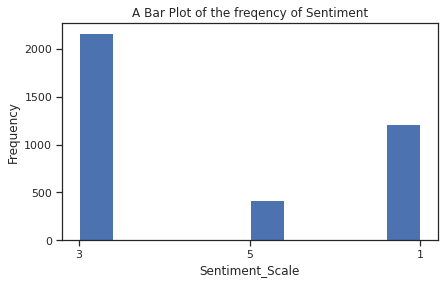

In [39]:
# A Bar plot of the sentiment scale
fig, ax = plt.subplots()
# plot histogram
ax.hist(df1['sentiment'])
# set title and labels
ax.set_title('A Bar Plot of the freqency of Sentiment')
ax.set_xlabel('Sentiment_Scale')
ax.set_ylabel('Frequency')

In [40]:
# Importing more libraries
import tweepy
from textblob import TextBlob
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
# Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#apple', 'apple', twt)
  twt = re.sub('#Apple', 'Apple', twt)
  twt = re.sub('#APPLE', 'APPLE', twt)
  twt = re.sub('#AAPL', 'APPLE', twt)
  twt = re.sub('#aapl', 'apple', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  return twt

In [42]:
# Cleaning the tweets
df1['Cleaned_Tweets'] = df1['text'].apply(cleanTwt)
df1.head()

,sentiment,golden,unit_state,trusted_judgments,date,text,Cleaned_Tweets
0,3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...,APPLE:The 10 best Steve Jobs emails ever...
1,3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...,My cat only chews @apple cords. Such an AppleS...
3,3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...,I agree with @jimcramer that the should own n...
4,3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL,Nobody expects the Spanish Inquisition APPLE


In [43]:
# Create a function to get the subjecttivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

# Create two new columns named 'Subjectivity' and 'Polarity'
df1['Subjectivity'] = df1['Cleaned_Tweets'].apply(getSubjectivity)
df1['Polarity'] = df1['Cleaned_Tweets'].apply(getPolarity)
df1.head()

,sentiment,golden,unit_state,trusted_judgments,date,text,Cleaned_Tweets,Subjectivity,Polarity
0,3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...,APPLE:The 10 best Steve Jobs emails ever...,0.30,1.00
1,3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,0.00,0.00
2,3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...,My cat only chews @apple cords. Such an AppleS...,0.75,0.00
3,3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...,I agree with @jimcramer that the should own n...,0.80,0.65
4,3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL,Nobody expects the Spanish Inquisition APPLE,0.00,0.00


In [44]:
# Create a funtion to get the Sentiment text (Negative, Neutral, Positive)
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [45]:
# Create a new column to store the sentiment score
df1['Sentiment_Score'] = df1['Polarity'].apply(getSentiment)
df1.head()

,sentiment,golden,unit_state,trusted_judgments,date,text,Cleaned_Tweets,Subjectivity,Polarity,Sentiment_Score
0,3,True,golden,10,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...,APPLE:The 10 best Steve Jobs emails ever...,0.30,1.00,Positive
1,3,True,golden,12,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,0.00,0.00,Neutral
2,3,True,golden,10,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...,My cat only chews @apple cords. Such an AppleS...,0.75,0.00,Neutral
3,3,True,golden,17,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...,I agree with @jimcramer that the should own n...,0.80,0.65,Positive
4,3,False,finalized,3,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL,Nobody expects the Spanish Inquisition APPLE,0.00,0.00,Neutral


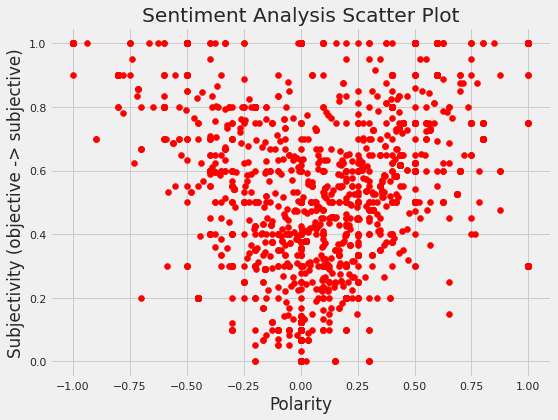

In [46]:
# Plot a scatter plot of the Subjectivity and Polarity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df1['Polarity'][i], df1['Subjectivity'][i], color='Red')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()


**ANALYSIS**
The scatter plot indicates that alot of the twitter users are neutral and subjective towards Apple products and or its services though the scatter plot also indicates some positively subjective sentiments and some negatively subjective sentiments.

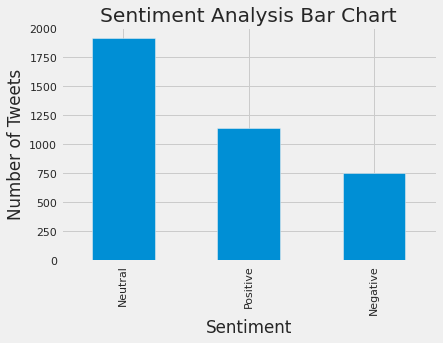

In [47]:
# Plot a Bar chart of the count of Positive, Negative and Neutral sentiment
df1['Sentiment_Score'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Chart')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

**CONCLUSION**
The bar plot showed that a great number of twitter users from this dataset 
are more neutral towards Apple products and or its services. This could be due to the fact that Apple products offer superior quality and security in comparison to other devices even though this comes at a high price and as such the twitter users feel that the high price might be worth the value they get from Apple products and or services.